<a href="https://colab.research.google.com/github/nantawat23308/UnsuperviseDimensionalityReduce/blob/main/Dimensional_Reduce_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Data House Price

In [ ]:
path_data = "/content/drive/MyDrive/house_price/clean_train.csv"

In [ ]:
data = pd.read_csv(path_data, index_col=0, header=0)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946+,RL,65.0,8450,Pave,NaN,0,Lvl,3,Inside,...,0,0,0,NaN,0,Feb,2008,WD,Normal,208500
2,1-STORY 1946+,RL,80.0,9600,Pave,NaN,0,Lvl,3,FR2,...,0,0,0,NaN,0,May,2007,WD,Normal,181500
3,2-STORY 1946+,RL,68.0,11250,Pave,NaN,1,Lvl,3,Inside,...,0,0,0,NaN,0,Sept,2008,WD,Normal,223500
4,2-STORY 1945-,RL,60.0,9550,Pave,NaN,1,Lvl,3,Corner,...,0,0,0,NaN,0,Feb,2006,WD,Abnorml,140000
5,2-STORY 1946+,RL,84.0,14260,Pave,NaN,1,Lvl,3,FR2,...,0,0,0,NaN,0,Dec,2008,WD,Normal,250000


## Missing Data

([0, 1, 2, 3, 4],
 [Text(0, 0, 'LotFrontage'),
  Text(1, 0, 'Alley'),
  Text(2, 0, 'MasVnrType'),
  Text(3, 0, 'GarageType'),
  Text(4, 0, 'MiscFeature')])

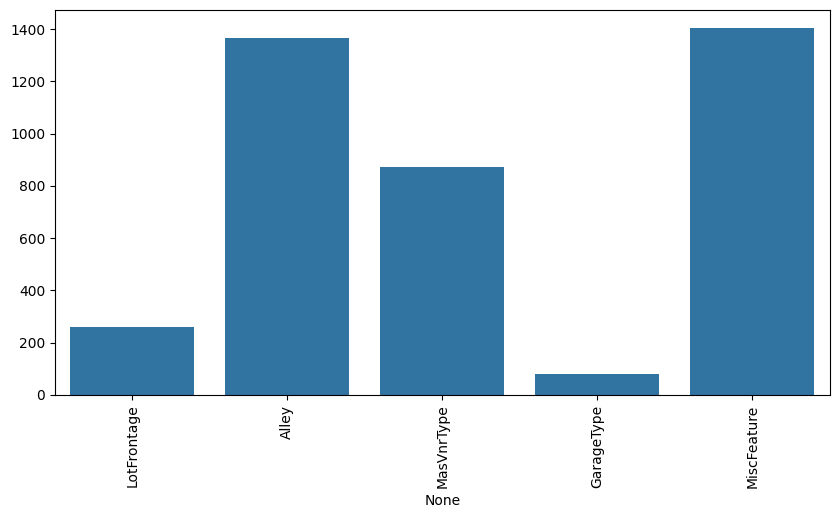

In [ ]:
missing_count = data.isna().sum()

with_missing = missing_count[missing_count > 0]

plt.figure(figsize=(10, 5))
sns.barplot(x=with_missing.index, y=with_missing.values)
plt.xticks(rotation=90)

In [ ]:
filtered_data = data.drop(columns=missing_count.index[missing_count > 500], axis=1)
print(data.shape[1])
print(filtered_data.shape[1])

80
77


In [ ]:
print(filtered_data["GarageType"].mode())
print(filtered_data["LotFrontage"].mean())

0    Attchd
Name: GarageType, dtype: object
69.69340016708438


In [ ]:
impute_data = filtered_data.copy()

impute_data["GarageType"] = filtered_data["GarageType"].fillna(filtered_data["GarageType"].mode()[0])
impute_data["LotFrontage"] = filtered_data["LotFrontage"].fillna(filtered_data["LotFrontage"].mean())


In [ ]:
numeric_data = impute_data.select_dtypes(include=np.number)
categorical_data = impute_data.select_dtypes(exclude=np.number)

In [ ]:
numeric_data.head()

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,0,3,0,7,5,2003,2003,196.0,...,61,0,0,0,0,0,0,0,2008,208500
2,80.0,9600,0,3,0,6,8,1976,1976,0.0,...,0,0,0,0,0,0,0,0,2007,181500
3,68.0,11250,1,3,0,7,5,2001,2002,162.0,...,42,0,0,0,0,0,0,0,2008,223500
4,60.0,9550,1,3,0,7,5,1915,1970,0.0,...,35,272,0,0,0,0,0,0,2006,140000
5,84.0,14260,1,3,0,8,5,2000,2000,350.0,...,84,0,0,0,0,0,0,0,2008,250000


In [ ]:
numeric_data.describe()

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,YrSold,SalePrice
count,1456.00000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.00000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,69.69340,10448.784341,0.405220,2.998626,0.062500,6.088599,5.576236,1971.18544,1984.819368,101.526786,...,46.221154,22.014423,3.418956,15.102335,2.055632,0.011676,0.565247,43.951923,2007.817308,180151.233516
std,20.90207,9860.763449,0.578492,0.052414,0.276593,1.369669,1.113966,30.20159,20.652143,177.011773,...,65.352424,61.192248,29.357056,55.828405,35.383772,0.211038,1.204174,496.941890,1.329394,76696.592530
min,21.00000,1300.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1872.00000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,60.00000,7538.750000,0.000000,3.000000,0.000000,5.000000,5.000000,1954.00000,1966.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129900.000000
50%,69.69340,9468.500000,0.000000,3.000000,0.000000,6.000000,5.000000,1972.00000,1993.500000,0.000000,...,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,79.00000,11588.000000,1.000000,3.000000,0.000000,7.000000,6.000000,2000.00000,2004.000000,163.250000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,313.00000,215245.000000,3.000000,3.000000,2.000000,10.000000,9.000000,2010.00000,2010.000000,1600.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,5.000000,4.000000,15500.000000,2010.000000,625000.000000


In [ ]:
numeric_data = numeric_data.iloc[:,:-1]

## Scalling data

# PCA

In [ ]:
std_data = (numeric_data - numeric_data.mean()) / numeric_data.std()

In [ ]:
pca_ins = PCA(random_state=25)
pca_ins.fit(std_data)
pca_embed = pca_ins.transform(std_data)

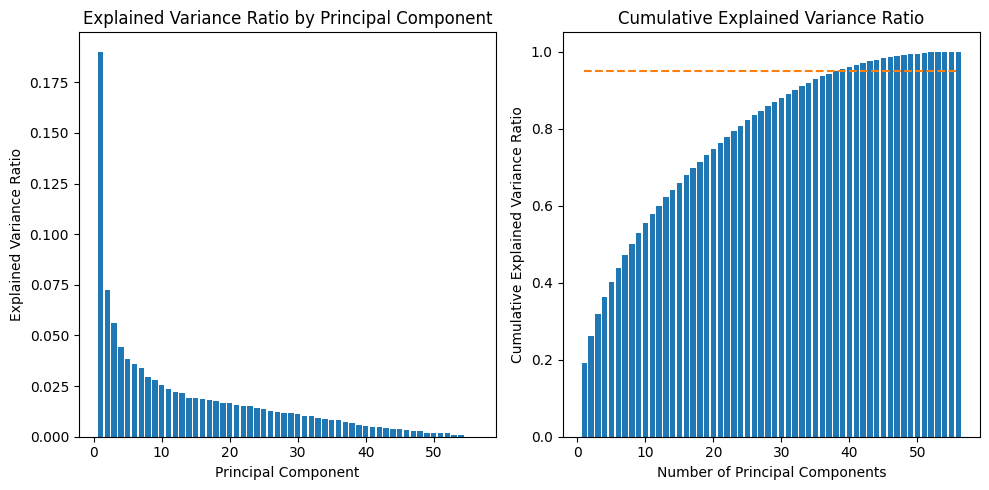

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.bar(range(1, pca_ins.n_components_ +1), pca_ins.explained_variance_ratio_)

plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio by Principal Component")

plt.subplot(1,2,2)
cumulative = np.cumsum(pca_ins.explained_variance_ratio_)
plt.bar(range(1, pca_ins.n_components_+1), cumulative)
plt.plot([1, std_data.shape[1]], [0.95, 0.95], "--", color = "tab:orange")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Cumulative Explained Variance Ratio")

plt.tight_layout()
plt.show()

## Loading

In [ ]:
pca_ins.components_[0]

array([ 0.09603902,  0.06373855,  0.09308445,  0.00028894,  0.0041173 ,
        0.253075  , -0.05323261,  0.22652297,  0.19420211,  0.14061945,
        0.22962716,  0.00966971,  0.21900042,  0.1044292 ,  0.10977712,
        0.11667178,  0.1162373 ,  0.00563606, -0.0041721 ,  0.07902073,
        0.20448713,  0.16334311,  0.12574282,  0.1115337 ,  0.181471  ,
        0.07082215, -0.0258788 ,  0.19387558,  0.07618156, -0.00693129,
        0.18759473,  0.09248306,  0.03929202, -0.05748748,  0.22058142,
        0.13998996, -0.03428846,  0.14413273,  0.16786412,  0.22621887,
        0.22108319,  0.23969418,  0.22870305,  0.14586874,  0.14499999,
        0.12203149,  0.10916284,  0.10311005, -0.07232399,  0.01580457,
        0.02554363,  0.00733681,  0.00678275, -0.05872051, -0.01119251,
       -0.00742298])

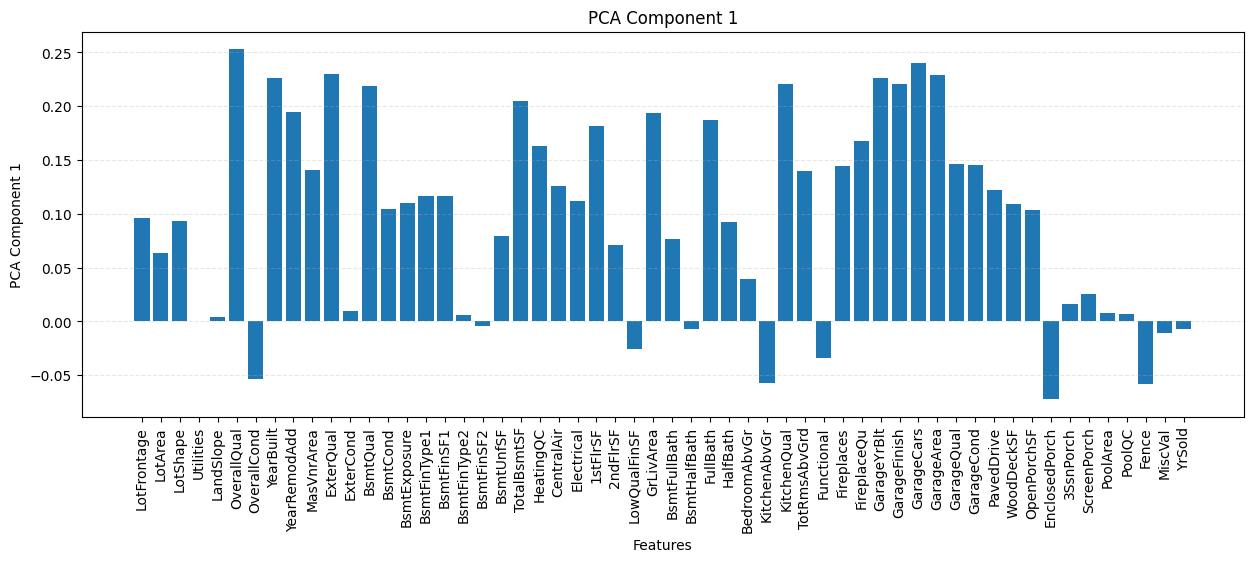

In [ ]:
plt.figure(figsize=(15, 5))
plt.bar(range(numeric_data.shape[1]), pca_ins.components_[0])
plt.xticks(range(numeric_data.shape[1]), labels=numeric_data.columns, rotation=90)
plt.xlabel("Features")
plt.ylabel("PCA Component 1")
plt.title("PCA Component 1")
plt.grid(linestyle = '--', axis='y', alpha=0.3)

plt.show()

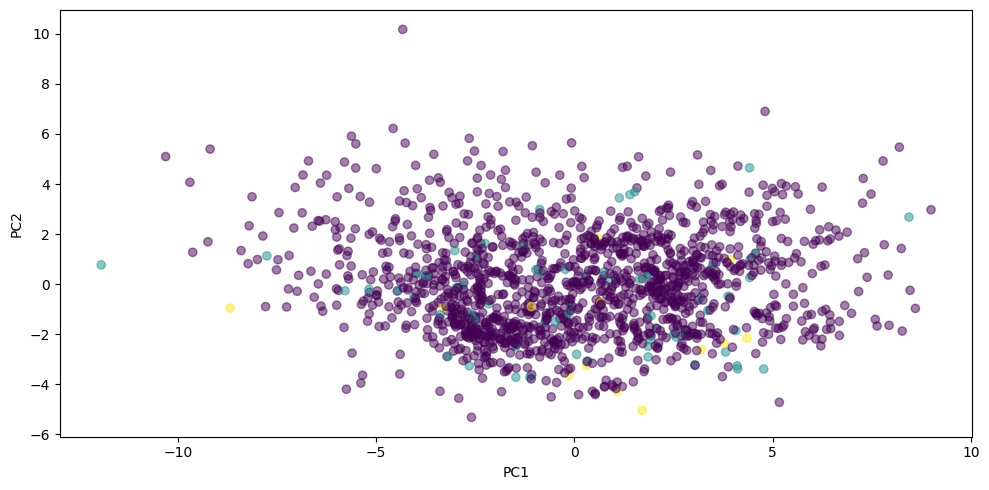

In [ ]:
plt.figure(figsize=(10, 5))

plt.scatter(pca_embed[:, 0], pca_embed[:, 1], alpha=0.5, c=data["LandSlope"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

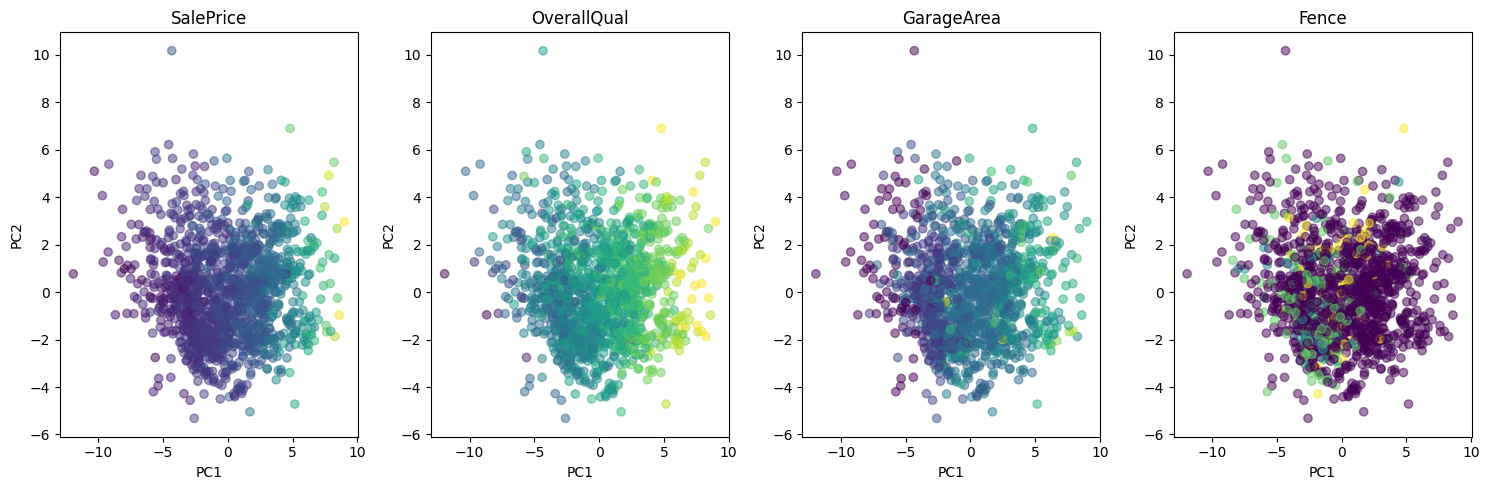

In [ ]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(["SalePrice", "OverallQual", "GarageArea", "Fence"], start=1):
  plt.subplot(1, 4, i)
  plt.scatter(pca_embed[:, 0], pca_embed[:, 1], alpha=0.5, c=data[feature])
  plt.xlabel("PC1")
  plt.ylabel("PC2")
  plt.title(feature)
plt.tight_layout()
plt.show()

# t-SNE

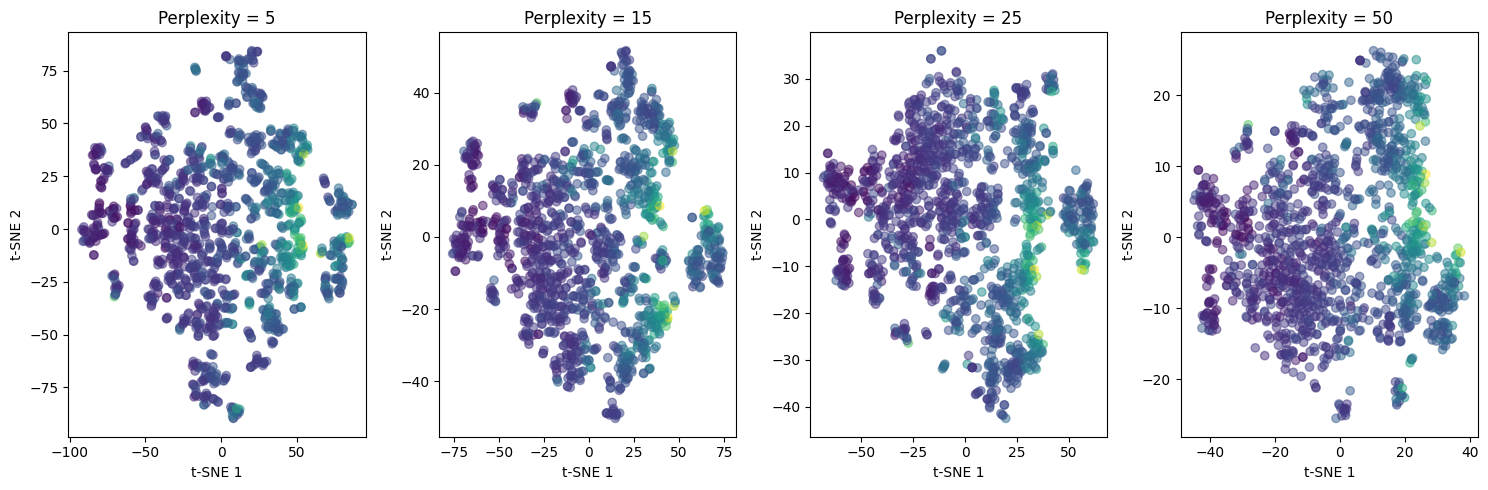

In [ ]:
perplexity = [5, 15, 25, 50]
plt.figure(figsize=(15, 5))
for i, p in enumerate(perplexity, start=1):
  tsne_ins = TSNE(n_components=2, perplexity=p, random_state=25)
  tsne_embed = tsne_ins.fit_transform(std_data)
  plt.subplot(1, 4, i)
  plt.scatter(tsne_embed[:, 0], tsne_embed[:, 1], alpha=0.5, c=data["SalePrice"])
  plt.xlabel("t-SNE 1")
  plt.ylabel("t-SNE 2")
  plt.title(f"Perplexity = {p}")
plt.tight_layout()
plt.show()

# UMAP

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridd

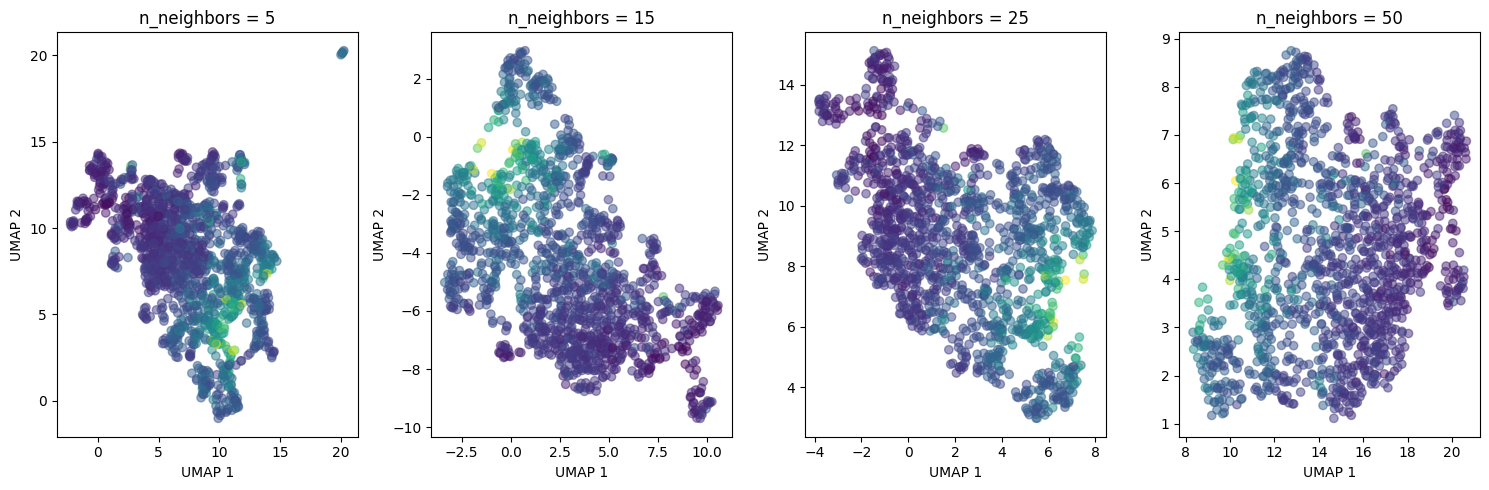

In [ ]:
neighbor = [5, 15, 25, 50]
plt.figure(figsize=(15, 5))

for i, n in enumerate(neighbor, start=1):
  umap_ins = umap.UMAP(n_neighbors=n, random_state=25, min_dist=0.5)
  umap_embed = umap_ins.fit_transform(std_data)
  plt.subplot(1, 4, i)
  plt.scatter(umap_embed[:, 0], umap_embed[:, 1], alpha=0.5, c=data["SalePrice"])
  plt.xlabel("UMAP 1")
  plt.ylabel("UMAP 2")
  plt.title(f"n_neighbors = {n}")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


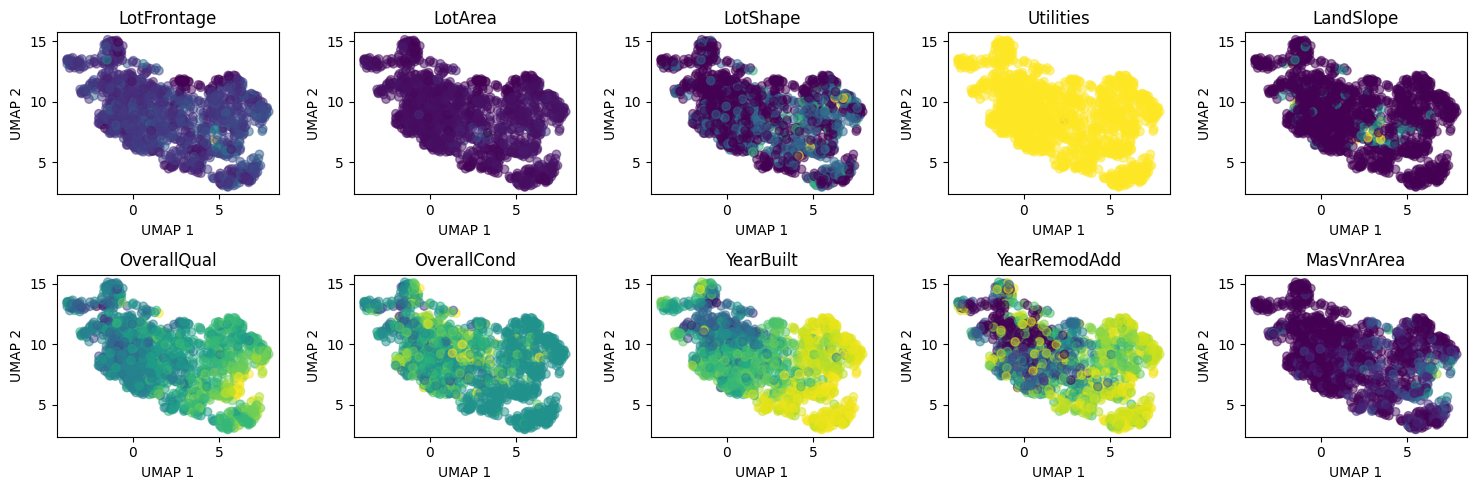

In [ ]:
umap_embed = umap.UMAP(n_neighbors=25, random_state=25, min_dist=0.5).fit_transform(std_data)
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numeric_data.columns[:10], start=1):
  plt.subplot(2, 5, i)
  plt.scatter(umap_embed[:, 0], umap_embed[:, 1], alpha=0.5, c=numeric_data[feature])
  plt.xlabel("UMAP 1")
  plt.ylabel("UMAP 2")
  plt.title(feature)
plt.tight_layout()
plt.show()